#Transfer Learning 



In [168]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools

tf.random.set_seed(1)


Loading the Data

In [169]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Reshaping the data so it is easier to work with

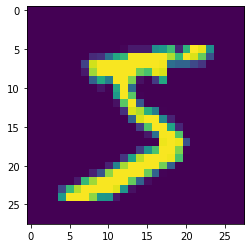

In [170]:
plt.imshow(X_train[0])

In [171]:
X_train = X_train.reshape(-1,112,112,3)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255
img_size = (96,96)

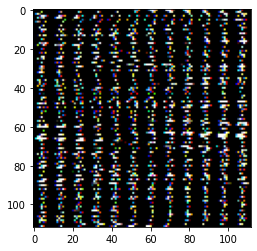

In [172]:
plt.imshow(X_train[0])

In [155]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(112,112,3),
                                               include_top=False,
                                               weights='imagenet')

In [156]:
base_model.trainable = False

In [157]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [158]:
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [159]:
inputs = tf.keras.Input(shape=(112, 112, 3))
x = data_augmentation(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [160]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

base_learning_rate = 0.0001
  # Compile the model
base_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), loss=loss_fn, metrics=['accuracy'])

history = base_model.fit(X_train,y_train, epochs=10)

ValueError: ignored

In [173]:
X_train.shape

(1250, 112, 112, 3)

In [174]:
y_train = y_train[0:1250]

In [175]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(10, activation='softmax')
])
m.build([None, 299, 299, 3])  # Batch input shape.

In [177]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

m.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = m.fit(X_train,y_train, epochs=10, validation_split=0.3)

Epoch 1/10
28/28 [==============================] - 26s 917ms/step - loss: 2.3143 - accuracy: 0.1349 - val_loss: 2.2892 - val_accuracy: 0.1467
Epoch 2/10
28/28 [==============================] - 25s 877ms/step - loss: 2.2185 - accuracy: 0.1771 - val_loss: 2.3770 - val_accuracy: 0.1733
Epoch 3/10
28/28 [==============================] - 25s 879ms/step - loss: 2.1956 - accuracy: 0.2023 - val_loss: 2.3718 - val_accuracy: 0.1653
Epoch 4/10
28/28 [==============================] - 25s 878ms/step - loss: 2.0690 - accuracy: 0.2663 - val_loss: 2.5335 - val_accuracy: 0.0987
Epoch 5/10
28/28 [==============================] - 25s 877ms/step - loss: 2.0157 - accuracy: 0.2949 - val_loss: 2.3779 - val_accuracy: 0.1227
Epoch 6/10
28/28 [==============================] - 25s 881ms/step - loss: 1.9607 - accuracy: 0.3143 - val_loss: 2.4384 - val_accuracy: 0.1333
Epoch 7/10
28/28 [==============================] - 25s 879ms/step - loss: 1.9325 - accuracy: 0.3211 - val_loss: 2.3524 - val_accuracy: 0.1387